## test the count with three parts

In [ ]:
import pandas as pd

# 文件路径
file1_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_20241217/02_translatome_riboseq/03_cal_merge_A132_A133/001.A132_loose_detect_ORF_id.tsv"  # 文件1：只有一列
## 90926 transcript
# file2_path = "/cpu2/jiang_tao/13.3Disoform/03_filter_parameter/01_filter_proteome/mmseqs2_longestORF_proteome/02_reference_proteome/orfanage/filtering_transcriptome/021.filtered_no_AFDB_sqanti3_classifcation_90928.tsv"
##  74693 transcripts consider NMD
file2_path="/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_20241217/01_transcriptome_QC/filtering_transcriptome/021.filtered_0916_gff3_classification_merged_detection_rate.tsv"
file3_path = "/cpu3/jiang_tao/02_jiang_tao/02_3Disoform_part2/14_web_cosmo/01_data/008.node_09tmscore_classifcation_label_gene_symbol_cluter_uniprotAnno_subtype_nodeColor_nodeSize.tsv"
output_file = "010.QC_transcriptome_loose_ORF_quanti_protein_universe_insection.tsv"  # 输出文件名

# 读取文件1，提取 transcript_id 列并按照","分隔取 id
df1 = pd.read_csv(file1_path, sep="\t", low_memory=False)
transcript_ids = set()
if "transcript_id" in df1.columns:
    for ids in df1["transcript_id"].dropna():
        transcript_ids.update(ids.split(","))

# 读取文件2，提取 isoform_id 并去重
df2 = pd.read_csv(file2_path, sep="\t", low_memory=False)
file2_ids = set(df2['isoform_id'].dropna())

# 读取文件3，提取 id 并去重
df3 = pd.read_csv(file3_path, sep="\t", low_memory=False)
file3_ids = set(df3['id'].dropna())

# 打印每个文件的总行数（不含列名）
print(f"File1 总行数：{len(transcript_ids)}")
print(f"File2 总行数：{len(df2)}")
print(f"File3 总行数：{len(df3)}")

# 计算两两文件第一列的交集数量
intersection_file1_file2 = len(transcript_ids.intersection(file2_ids))
intersection_file1_file3 = len(transcript_ids.intersection(file3_ids))
intersection_file2_file3 = len(file2_ids.intersection(file3_ids))

# 打印两两交集数量
print(f"File1 和 File2 的第一列交集数量：{intersection_file1_file2}")
print(f"File1 和 File3 的第一列交集数量：{intersection_file1_file3}")
print(f"File2 和 File3 的第一列交集数量：{intersection_file2_file3}")

# 计算三个文件的交集
intersection_3_files = transcript_ids.intersection(file2_ids).intersection(file3_ids)

# 打印三个文件的交集总数
print(f"三个文件第一列的交集数量：{len(intersection_3_files)}")

# 单独统计第三个文件中以 'AF' 开头的 ID 总数
af_in_file3_count = sum(1 for id_ in file3_ids if str(id_).startswith("AF"))

# 打印 'AF' 开头的统计结果
print(f"File3 中以 'AF' 开头的 ID 总数：{af_in_file3_count}")

# 基于第三个文件筛选满足条件的行
filtered_df3 = df3[
    df3['id'].isin(intersection_3_files) | df3['id'].str.startswith('AF', na=False)
]

# 保存筛选后的数据为新文件
filtered_df3.to_csv(output_file, sep="\t", index=False)

# 读取新文件并打印总行数（不含行头）
new_file = pd.read_csv(output_file, sep="\t", low_memory=False)
print(f"新文件的总行数（不含列名）：{len(new_file)}")


File1 总行数：99376
File2 总行数：74693
File3 总行数：48228
File1 和 File2 的第一列交集数量：64298
File1 和 File3 的第一列交集数量：26992
File2 和 File3 的第一列交集数量：24105
三个文件第一列的交集数量：21582
File3 中以 'AF' 开头的 ID 总数：15639
新文件的总行数（不含列名）：37221


/tmp/ipykernel_3988725/1532258188.py:62: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


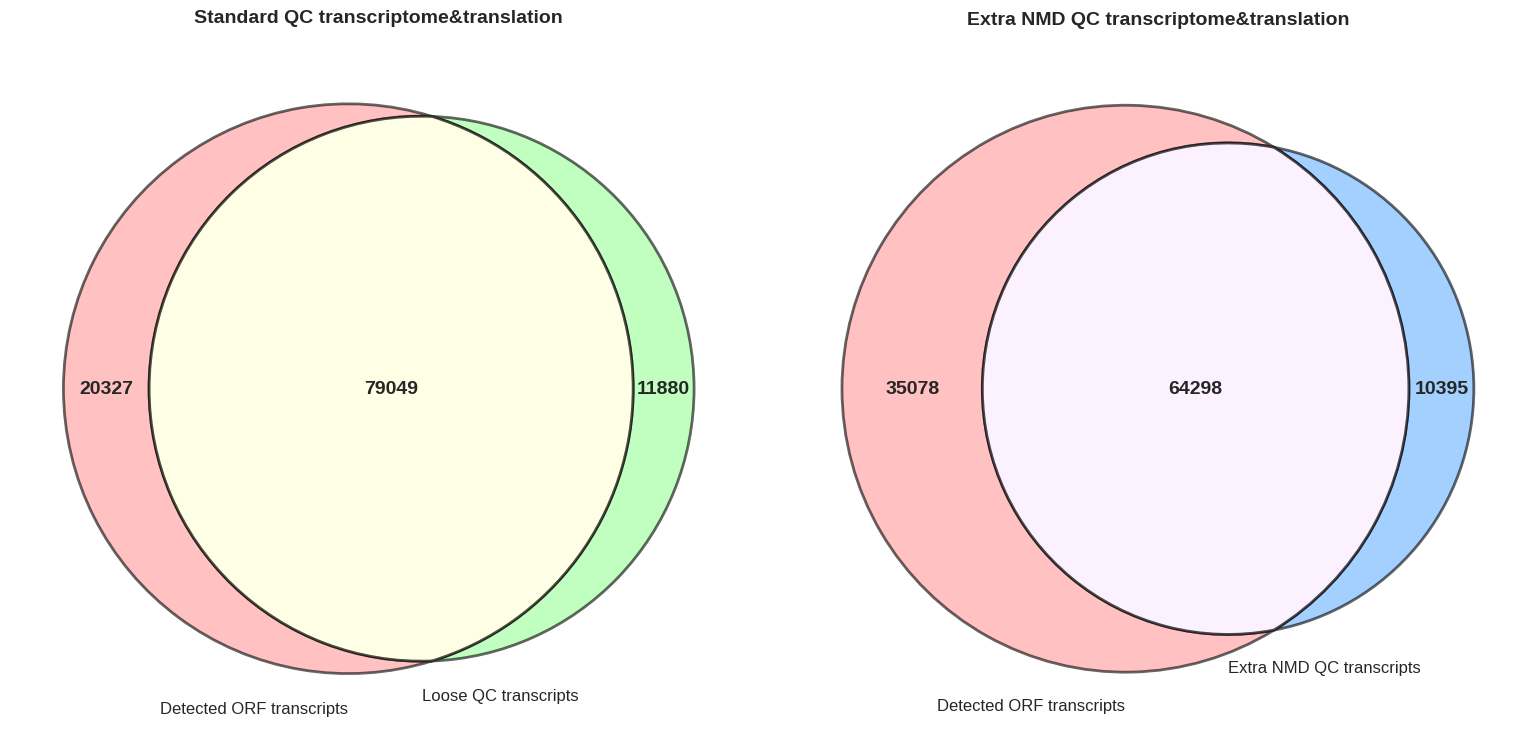

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib.colors as mcolors

def read_file_ids(file_path, id_column='isoform_id', separator='\t'):
    """Read IDs from file and return as set"""
    df = pd.read_csv(file_path, sep=separator, low_memory=False)
    if id_column == "transcript_id":
        ids = set()
        for id_str in df[id_column].dropna():
            ids.update(id_str.split(","))
        return ids
    return set(df[id_column].dropna())

def create_custom_venn(set1, set2, labels, ax, colors=None):
    """Create a customized Venn diagram"""
    if colors is None:
        colors = ['#FF9999', '#66B2FF']  # Soft red and soft blue
    
    # Calculate set differences and intersection
    only_1 = set1 - set2
    only_2 = set2 - set1
    intersection = set1 & set2
    
    # Create Venn diagram with custom colors and properties
    venn = venn2(subsets=(len(only_1), len(only_2), len(intersection)),
                 set_labels=labels,
                 ax=ax,
                 set_colors=(colors[0], colors[1]),
                 alpha=0.6)  # Set transparency
    
    # Customize the appearance
    for patch in venn.patches:
        patch.set_edgecolor('black')  # Add black borders
        patch.set_linewidth(2.0)      # Make borders thicker
    
    # Customize text appearance
    for text in venn.set_labels:
        if text is not None:
            text.set_fontsize(12)
            # text.set_fontweight('bold')
    
    # Make the numbers (subset labels) larger
    for text in venn.subset_labels:
        if text is not None:
            text.set_fontsize(14)  # Increased from 10 to 14
            text.set_fontweight('bold')  # Added bold to numbers

def main():
    # File paths
    file1_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_20241217/02_translatome_riboseq/03_cal_merge_A132_A133/001.A132_loose_detect_ORF_id.tsv"
    file2_path_1 = "/cpu2/jiang_tao/13.3Disoform/03_filter_parameter/01_filter_proteome/mmseqs2_longestORF_proteome/02_reference_proteome/orfanage/filtering_transcriptome/021.filtered_no_AFDB_sqanti3_classifcation_90928.tsv"
    file2_path_2 = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_20241217/01_transcriptome_QC/filtering_transcriptome/021.filtered_0916_gff3_classification_merged_detection_rate.tsv"
    
    # Read data
    file1_ids = read_file_ids(file1_path, "transcript_id")
    file2_ids_1 = read_file_ids(file2_path_1)
    file2_ids_2 = read_file_ids(file2_path_2)
    
    # Create figure with custom style
    plt.style.use('seaborn')
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    fig.patch.set_facecolor('white')
    
    # Custom colors for each diagram
    colors_1 = ['#FF9999', '#99FF99']  # Soft red and soft green
    colors_2 = ['#FF9999', '#66B2FF']  # Soft red and soft blue
    
    # Create both Venn diagrams
    create_custom_venn(file1_ids, file2_ids_1, 
                      ('Detected ORF transcripts', 'Loose QC transcripts'), 
                      axes[0], colors_1)
    create_custom_venn(file1_ids, file2_ids_2, 
                      ('Detected ORF transcripts', 'Extra NMD QC transcripts'), 
                      axes[1], colors_2)
    
    # Customize titles
    axes[0].set_title('Standard QC transcriptome&translation', 
                     pad=20, fontsize=14, fontweight='bold')
    axes[1].set_title('Extra NMD QC transcriptome&translation', 
                     pad=20, fontsize=14, fontweight='bold')
    
    # Adjust layout and display
    plt.tight_layout(pad=3.0)
    plt.show()

if __name__ == "__main__":
    main()